In [1]:
print("I am sakshi")

I am sakshi


In [2]:
# !pip install tensorflow

In [3]:
# pip uninstall pyplot

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.image as mpimg 

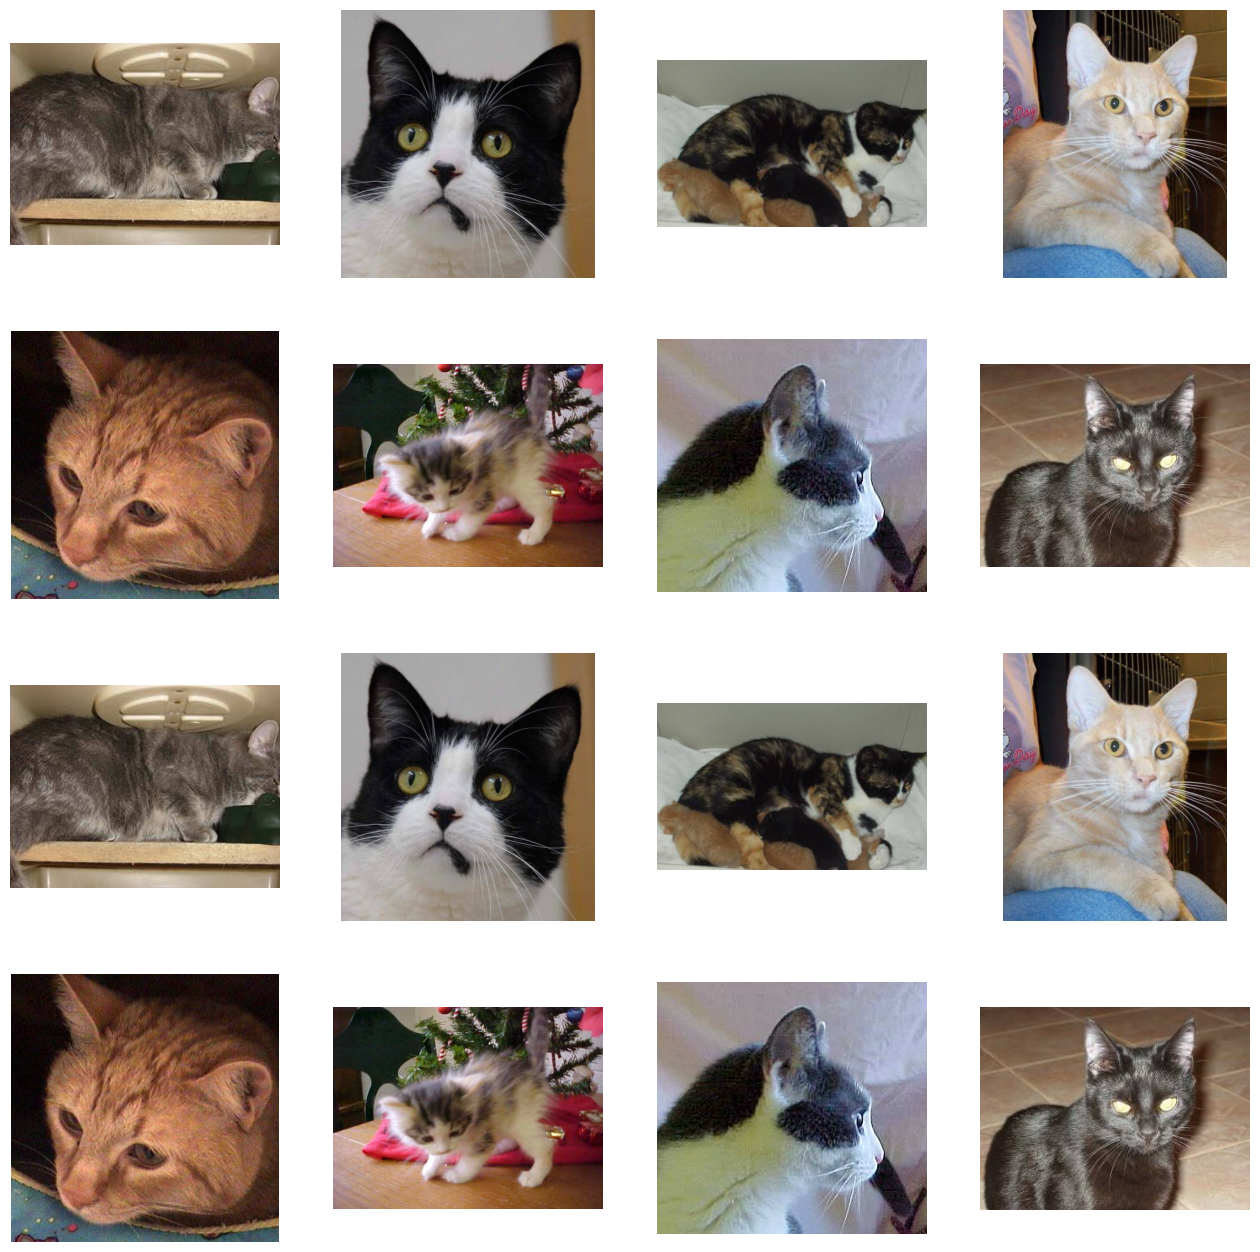

In [3]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('Downloads/Datasets/training_set/training_set/cats')
dog_dir = os.path.join('Downloads/Datasets/training_set/training_set/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210
cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

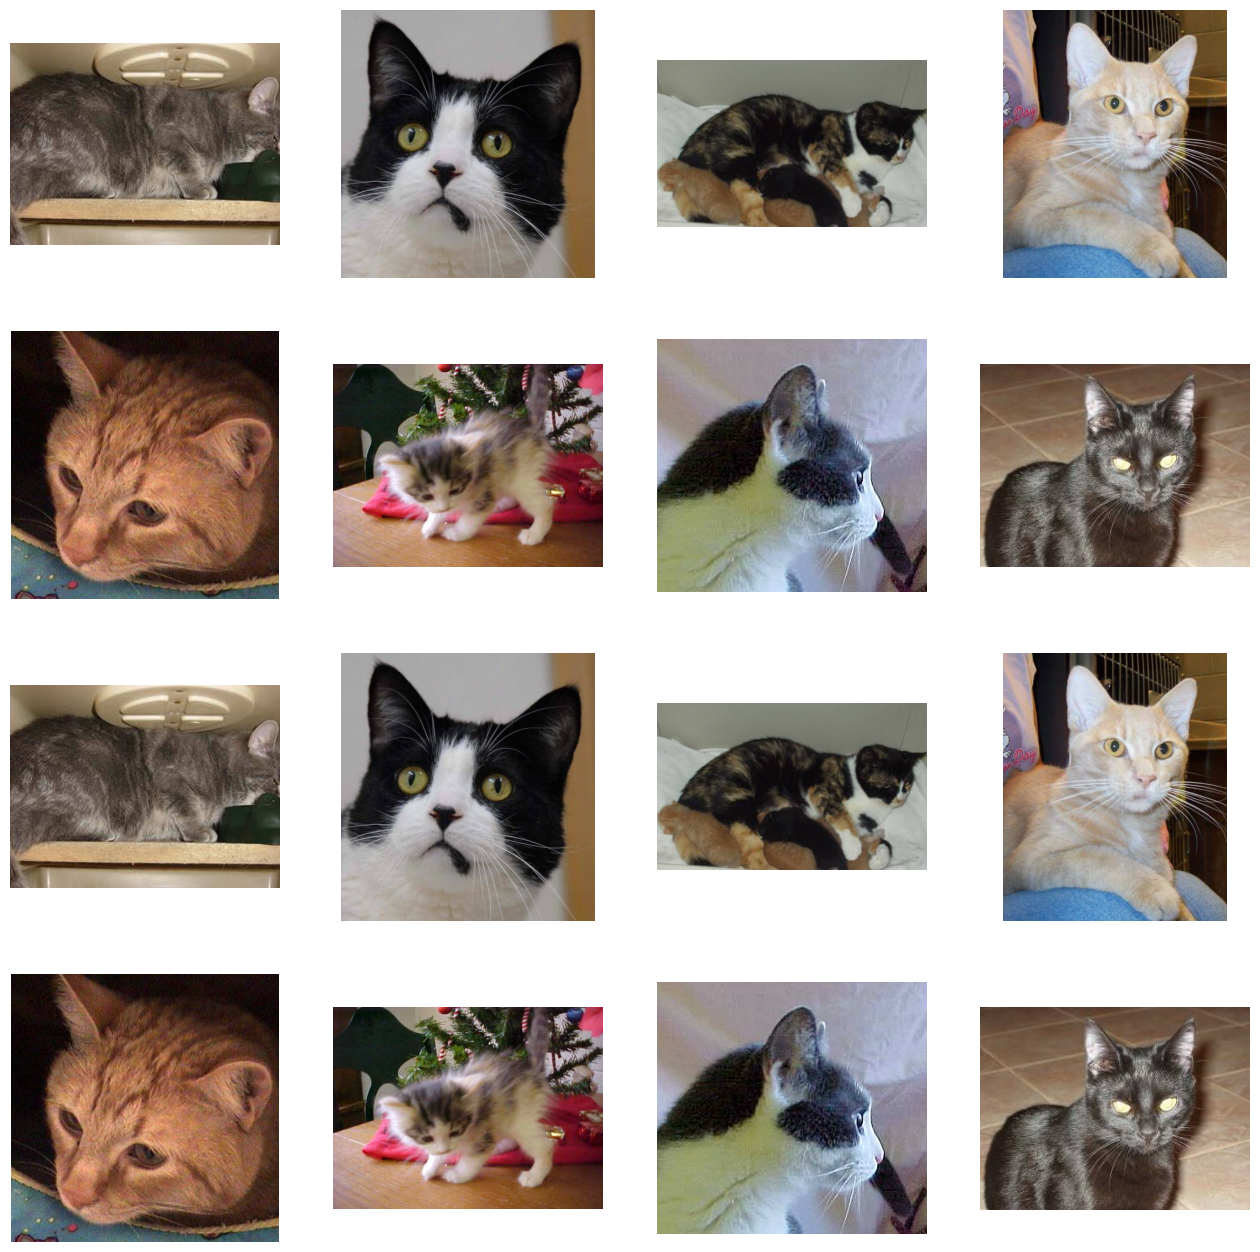

In [5]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('Downloads/Datasets/training_set/training_set/cats')
dog_dir = os.path.join('Downloads/Datasets/training_set/training_set/cats')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [8]:
# !pip install pydot==2.0.0 
# !pip install graphviz

In [10]:
# !pip show pydot

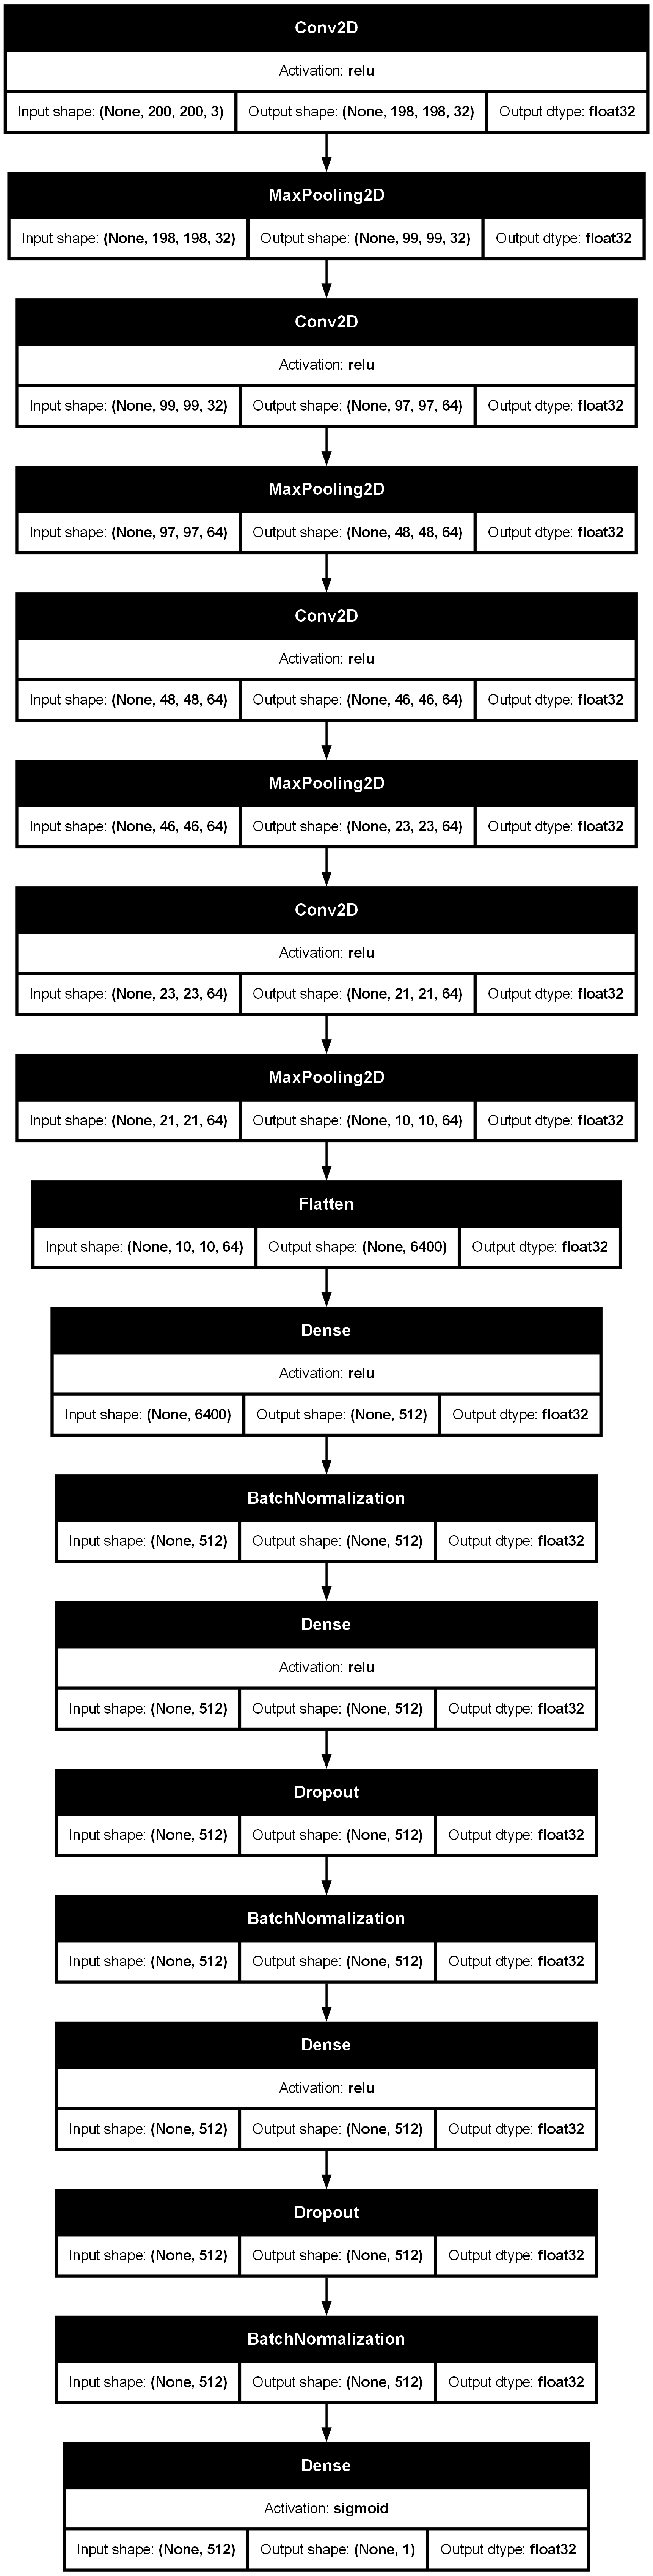

In [11]:
# from tensorflow.keras.utils import plot_model
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

NameError: name 'model' is not defined

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    18,874,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,894,017 (72.07 MB)

 Trainable params: 18,894,017 (72.07 MB)

 Non-trainable params: 0 (0.00 B)

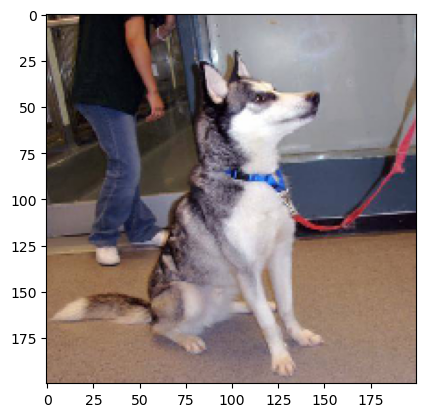

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Dog


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import load_model

# Define a simple CNN model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))  # 32 filters, 3x3 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling

model.add(Conv2D(64, (3, 3), activation='relu'))  # Second conv layer with 64 filters
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding fully connected layers (dense layers)
model.add(Dense(units=128, activation='relu'))  # Hidden layer with 128 units
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with 1 unit (for binary classification)

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',  # Adam optimizer
    metrics=['accuracy']  # Accuracy metric
)

# Summary of the model
model.summary()

# Load an input image
test_image = image.load_img('Downloads/Datasets/test_set/test_set/dogs/dog.4001.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict the result
result = model.predict(test_image)

# Mapping result array with the main name list (0 = Cat, 1 = Dog)
if result >= 0.5:
    print("Dog")
else:
    print("Cat")


Found 8006 images belonging to 2 classes.
Found 2026 images belonging to 2 classes.
Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.5220 - loss: 0.8591 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.5299 - loss: 0.6897 - val_accuracy: 0.5691 - val_loss: 0.6751
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.5832 - loss: 0.6778 - val_accuracy: 0.6412 - val_loss: 0.6502
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 329s 1s/step - accuracy: 0.6093 - loss: 0.6628 - val_accuracy: 0.6407 - val_loss: 0.6440
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.6430 - loss: 0.6387 - val_accuracy: 0.6767 - val_loss: 0.6018
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.6541 - loss: 0.6171 - val_accuracy: 0.7206 - val_loss: 0.5607
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 302s 1s/step - accuracy: 0.6732 - loss: 0.5967 - val_accuracy: 0.7098 - val_loss: 0.5696
Epoch 8/10
25

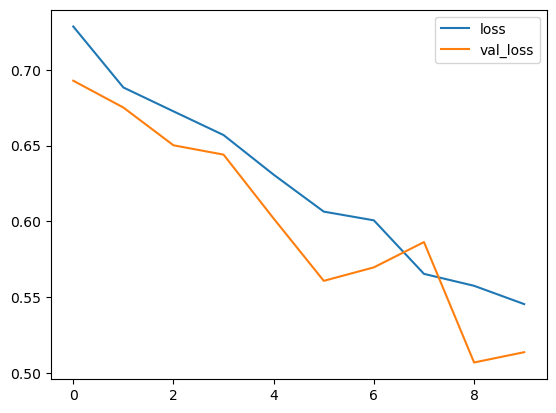

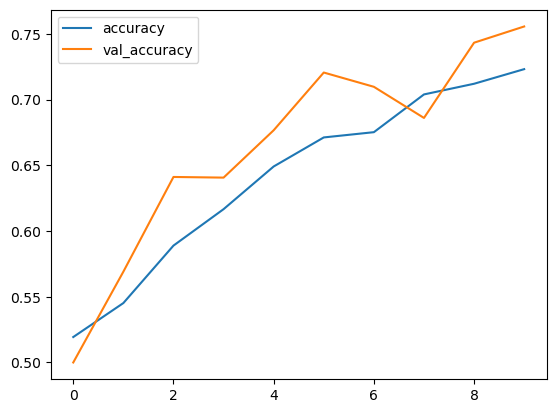

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))  # Input shape matches target_size
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening before Dense layers
model.add(Flatten())

# Adding fully connected layers (dense layers)
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(
    loss='binary_crossentropy',  # Loss function for binary classification
    optimizer='adam',
    metrics=['accuracy']
)

# Set up image data generator for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalizing the image pixels
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation/test data

# Load images from directory and resize them to a target size (e.g., 150x150)
train_data = train_datagen.flow_from_directory('Downloads/Datasets/training_set/training_set/',
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory('Downloads/Datasets/test_set/test_set/',
                                             target_size=(150, 150),
                                             batch_size=32,
                                             class_mode='binary')

# Train the model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

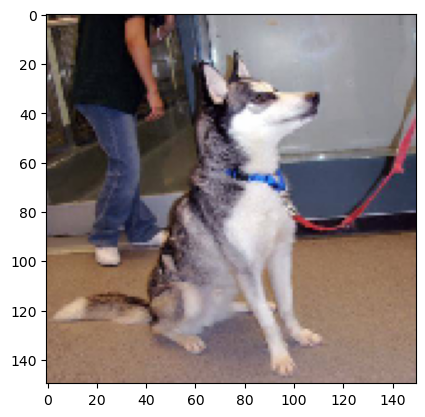

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
dog


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Input image with target size 150x150 (same as training data)
test_image = image.load_img('Downloads/Datasets/test_set/test_set/dogs/dog.4001.jpg', target_size=(150, 150))

# For showing the image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Expand dimensions for batch size

# Predict using the model
result = model.predict(test_image)

# Mapping result array to class labels (0 = Cat, 1 = Dog)
if result >= 0.5:
    print("cat")
else:
    print("dog")


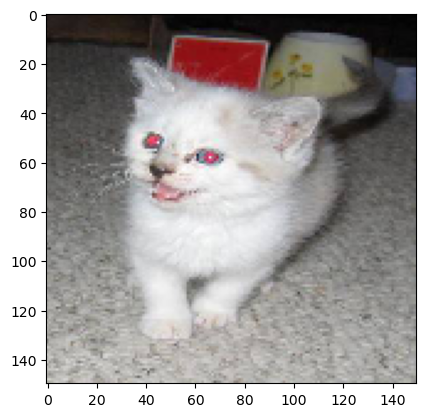

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
cat


In [28]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Input image with target size 150x150 (same as training data)
test_image = image.load_img('Downloads/Datasets/test_set/test_set/cats/cat.4018.jpg', target_size=(150, 150))

# For showing the image
plt.imshow(test_image)
plt.show()

# Preprocess the image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Expand dimensions for batch size

# Predict using the model
result = model.predict(test_image)

# Mapping result array to class labels (0 = Cat, 1 = Dog)
if result >= 0.5:
    print("cat")
else:
    print("dog")
